In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# ADDING SPECIAL OPTIMIZERS, LOSSES OR METRICS
"""from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])"""

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5206 - acc: 0.7941 - val_loss: 0.4158 - val_acc: 0.8529
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3161 - acc: 0.9039 - val_loss: 0.3101 - val_acc: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2296 - acc: 0.9270 - val_loss: 0.3267 - val_acc: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1837 - acc: 0.9421 - val_loss: 0.2819 - val_acc: 0.8880
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1518 - acc: 0.9524 - val_loss: 0.2806 - val_acc: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1247 - acc: 0.9623 - val_loss: 0.2960 - val_acc: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1038 - acc: 0.9696 - val_loss: 0.3025 - val_acc: 0.8859
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0866 - a

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

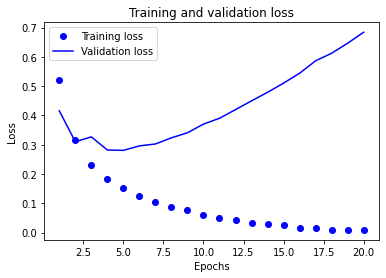

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

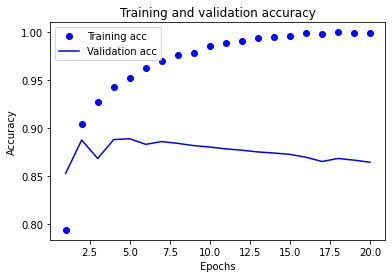

In [17]:
plt.clf()
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 30ms/step - loss: 0.4619 - accuracy: 0.8262
Epoch 2/5
49/49 [==============================] - 1s 29ms/step - loss: 0.2699 - accuracy: 0.9065
Epoch 3/5
49/49 [==============================] - 1s 30ms/step - loss: 0.2084 - accuracy: 0.9257
Epoch 4/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1742 - accuracy: 0.9376
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.3150 - accuracy: 0.8778


In [19]:
results

[0.31495338678359985, 0.8777999877929688]

In [20]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.21371533],
       [0.99991304],
       [0.97449714],
       ...,
       [0.14841762],
       [0.09473719],
       [0.7444948 ]], dtype=float32)